# Unit 4 - Noisy data
---
1. [Histograms](#section1)
2. [Standard deviation](#section2)
3. [Boxplots](#section3)


In [2]:
import pandas as pd
import numpy as np

<a id='section1'></a>

### 1. Histograms

#### Gym example

Taken from: https://data36.com/plot-histogram-python-pandas/

In [3]:
mu = 168 #mean
sigma = 5 #stddev
sample = 250
np.random.seed(0)
height_f = np.random.normal(mu, sigma, sample).astype(int)

In [4]:
mu = 176 #mean
sigma = 6 #stddev
sample = 250
np.random.seed(1)
height_m = np.random.normal(mu, sigma, sample).astype(int)

In [5]:
gym = pd.DataFrame({'height_f': height_f, 'height_m': height_m})
gym.head(7)

,height_f,height_m
0,176,185
1,170,172
2,172,172
3,179,169
4,177,181
5,163,162
6,172,186


To begin with - why a histogram?

This is what happens if we just plot lines:

<AxesSubplot:>

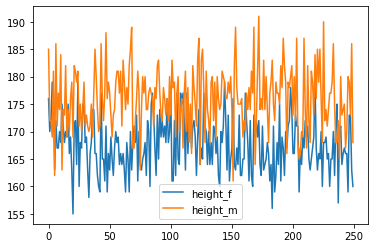

In [6]:
gym.plot()

Ummm.. it's very messy. 

#### Different histograms:

array([[<AxesSubplot:title={'center':'height_f'}>]], dtype=object)

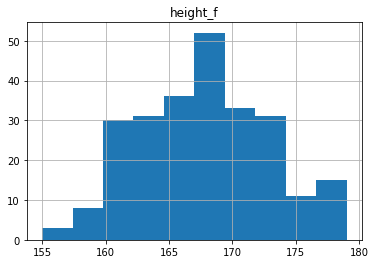

In [10]:
gym.hist('height_f')

array([[<AxesSubplot:title={'center':'height_f'}>,
        <AxesSubplot:title={'center':'height_m'}>]], dtype=object)

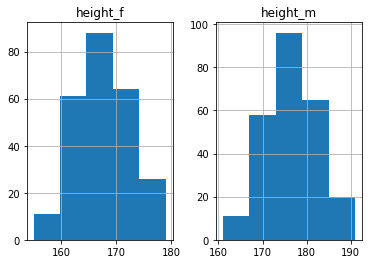

In [8]:
gym.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

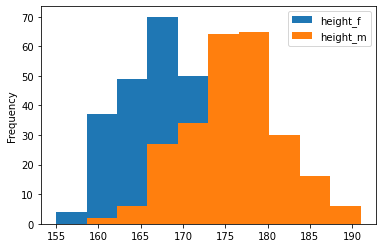

In [12]:
gym.plot.hist()

In [ ]:
gym.plot.hist(bins=20, alpha=0.7)

---
#### Back to our vaccinations data:

In [13]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


#### Look at data for different countries
#### Use `groupby()` to group according to location

#### Attempt #1 - what is wrong?

In [14]:
vacc_df.groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,6.001520e+05,13921.0,119926.0,0.31
Africa,3.280544e+07,613136.0,8435887.0,0.63
Albania,7.764610e+05,17565.0,290333.0,10.09
Algeria,7.500000e+04,3748.0,NaN,NaN
Andorra,3.231700e+04,1182.0,4704.0,6.09
...,...,...,...,...
Wallis and Futuna,8.283000e+03,343.0,3931.0,34.95
World,1.937501e+09,33225237.0,430361678.0,5.52
Yemen,1.040700e+05,4276.0,NaN,NaN


#### Attempt #2 

#### Is this better?

In [15]:
vacc_df.fillna('0').groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,NaN,NaN,NaN,NaN
Africa,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN
...,...,...,...,...
Wallis and Futuna,NaN,NaN,NaN,NaN
World,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,NaN,NaN


#### Attempt #3 - change the 0 from string to int, and finally, it works :-)

In [16]:
vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Afghanistan,6.001520e+05,13921.0,119926.0,0.31
Africa,3.280544e+07,613136.0,8435887.0,0.63
Albania,7.764610e+05,17565.0,290333.0,10.09
Algeria,7.500000e+04,3748.0,0.0,0.00
Andorra,3.231700e+04,1182.0,4704.0,6.09
...,...,...,...,...
Wallis and Futuna,8.283000e+03,343.0,3931.0,34.95
World,1.937501e+09,33225237.0,430361678.0,5.52
Yemen,1.040700e+05,4276.0,0.0,0.00


#### The `world` row shouldn't be there. Remove it using `.drop()` and `.index() :

In [17]:
vacc_df.drop(vacc_df.loc[vacc_df.location == 'World'].index, inplace = True)

---
#### Your turn:
>What do you think `.index` does? Why is it there? How can you find out?
---

Before we continue, just assign this long row to a new dataframe, will be easier

In [18]:
grouped_df = vacc_df.fillna(0).groupby('location')[['total_vaccinations','daily_vaccinations','people_fully_vaccinated','people_fully_vaccinated_per_hundred']].max().copy()
grouped_df.tail()

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Wales,3253356.0,33151.0,1111929.0,35.27
Wallis and Futuna,8283.0,343.0,3931.0,34.95
Yemen,104070.0,4276.0,0.0,0.00
Zambia,147033.0,5680.0,5286.0,0.03
Zimbabwe,1020078.0,22863.0,344400.0,2.32


#### sort the values using 'sort_values()`

In [22]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')

,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Nicaragua,167500.0,7350.0,0.0,0.00
Bhutan,482716.0,91636.0,0.0,0.00
Papua New Guinea,11537.0,1220.0,0.0,0.00
Botswana,142864.0,6936.0,0.0,0.00
Ethiopia,1813739.0,35777.0,0.0,0.00
...,...,...,...,...
Saint Helena,7091.0,97.0,3528.0,58.11
Israel,10583468.0,184942.0,5132499.0,59.30
San Marino,42529.0,725.0,20958.0,61.75


#### Histogram according to all values:

array([[<AxesSubplot:title={'center':'total_vaccinations'}>,
        <AxesSubplot:title={'center':'daily_vaccinations'}>],
       [<AxesSubplot:title={'center':'people_fully_vaccinated'}>,
        <AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

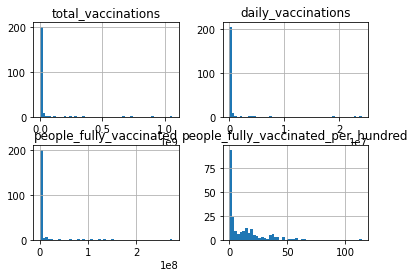

In [23]:
grouped_df.hist(bins=50)

#### Histogram according to people_fully_vaccinated_per_hundred

array([[<AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

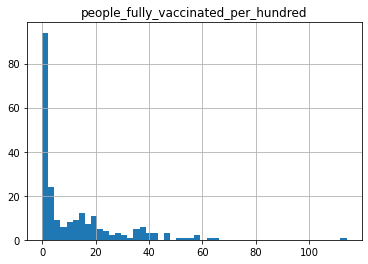

In [24]:
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

#### Remove rows with 0's

Note that this is different than changing values to 0's

array([[<AxesSubplot:title={'center':'people_fully_vaccinated_per_hundred'}>]],
      dtype=object)

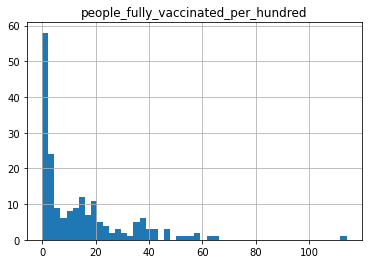

In [25]:
grouped_df.drop(grouped_df[grouped_df.people_fully_vaccinated_per_hundred == 0.0].index, inplace=True)
#grouped_df
grouped_df.hist('people_fully_vaccinated_per_hundred',bins=50)

---
>#### Your turn:
>
>Do the same, but for another column
---


---
>### Functions covered in this unit:
>
> `std()` - standard deviation
>
> `.hist(data, num_bins)` - the data and the number of bins 
>
> `.plot()` - simple line plot
>
> `.hist(data, num_bins, alpha)` - the data, the number of bins and the transparency (default is 10 bins, all data and not transparent)
>
> `.plot.hist()` - histograms on same chart
>
> `.drop()` - removes unwanted rows or columns
>
> `.index()` - index of the selected rows
>
> `sort_values()` - self explantory.. it just sorts values
>
---

### 2. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [ ]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

In [ ]:
df.mean()

In [ ]:
df.std()

<a id='section2'></a>

### 3. Boxplots

In [26]:
np.random.seed(2345)
df = pd.DataFrame(np.random.randn(20,4),
                  columns=['C1', 'C2', 'C3', 'C4'])
df.head()

,C1,C2,C3,C4
0,-0.951299,1.768772,-1.141827,0.710755
1,0.510951,1.149029,-0.538460,-0.736645
2,-0.075996,0.848818,0.649783,-0.571212
3,-0.914158,-0.123520,0.281634,0.795612
4,0.179394,1.202007,0.371815,-0.290084


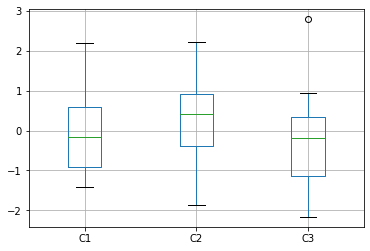

In [27]:
boxplot = df.boxplot(column=['C1', 'C2', 'C3'])

<AxesSubplot:>

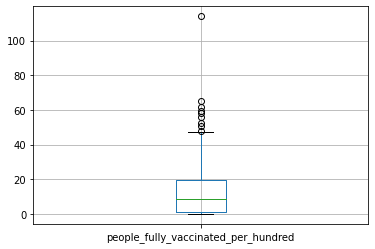

In [28]:
grouped_df.boxplot('people_fully_vaccinated_per_hundred')

In [29]:
grouped_df.sort_values('people_fully_vaccinated_per_hundred')


,total_vaccinations,daily_vaccinations,people_fully_vaccinated,people_fully_vaccinated_per_hundred
location,,,,
Central African Republic,18408.0,934.0,717.0,0.01
Uganda,595924.0,11798.0,4129.0,0.01
Lesotho,36759.0,666.0,122.0,0.01
Somalia,134133.0,1275.0,4714.0,0.03
Vietnam,1034867.0,54895.0,28961.0,0.03
...,...,...,...,...
Saint Helena,7091.0,97.0,3528.0,58.11
Israel,10583468.0,184942.0,5132499.0,59.30
San Marino,42529.0,725.0,20958.0,61.75


This doesn't seem to fit
https://ourworldindata.org/grapher/covid-vaccination-doses-per-capita

Is this an error???